Found 2000 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.5148 - loss: 1.3849 - val_accuracy: 0.6000 - val_loss: 0.5859
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.6159 - loss: 0.6556 - val_accuracy: 0.6000 - val_loss: 0.5424
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.6883 - loss: 0.5965 - val_accuracy: 0.6000 - val_loss: 0.6252
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.7883 - loss: 0.4780 - val_accuracy: 0.7000 - val_loss: 0.6833
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.8337 - loss: 0.3838 - val_accuracy: 0.8000 - val_loss: 0.7447
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.8931 - loss: 0.2845 - val_accuracy: 0.6000 - val_loss: 1.1790
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.9347 - loss: 0.1698 - val_accuracy: 0.6000 - val_loss: 0.7662
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.9691 - loss: 0.1069 - val_accuracy: 0.6000 - val_

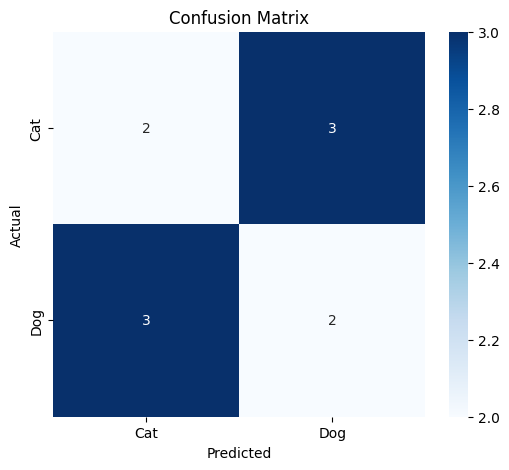


Classification Report:
              precision    recall  f1-score   support

         Cat       0.40      0.40      0.40         5
         Dog       0.40      0.40      0.40         5

    accuracy                           0.40        10
   macro avg       0.40      0.40      0.40        10
weighted avg       0.40      0.40      0.40        10

Model saved as 'cat_dog_cnn_model.h5'

--- Predicting Images from Internet ---

File: dogo3.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: Cat (62.86%)
----------------------------------------
File: cato2.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prediction: Cat (99.84%)
----------------------------------------
File: cato3.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prediction: Cat (100.00%)
----------------------------------------
File: dogo2.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prediction: Dog (99.91%)
----------------------------------------
File: dogo1.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prediction: Dog (100.00%)
---

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Directories 
train_dir = 'train'
test_dir = 'test'
internet_dir = 'internet_images'  # folder where internet images are stored

# Data Preprocessing 
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Model Architecture 
model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile Model 
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train Model 
history = model.fit(train_data, epochs=10, validation_data=test_data)

# Evaluate Model 
loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion Matrix & Report
test_data.reset()
predictions = (model.predict(test_data) > 0.5).astype("int32")
labels = test_data.classes

cm = confusion_matrix(labels, predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(classification_report(labels, predictions, target_names=['Cat', 'Dog']))

# Save Model 
model.save("cat_dog_cnn_model.h5")
print("Model saved as 'cat_dog_cnn_model.h5'")

# Internet Image Prediction Function 
def predict_image(img_path):
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    label = 'Dog' if prediction > 0.5 else 'Cat'
    confidence = prediction if prediction > 0.5 else 1 - prediction

    print(f"Prediction: {label} ({confidence * 100:.2f}%)")

# Predict on Internet Images 
print("\n--- Predicting Images from Internet ---\n")
for filename in os.listdir(internet_dir):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        print(f"File: {filename}")
        predict_image(os.path.join(internet_dir, filename))
        print("-" * 40)